In [ ]:
import albumentations as A

In [ ]:
from torchvision import datasets
data_folder = './data'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In [ ]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def to_numpy(tensor):
    return tensor.cpu().detach().numpy()

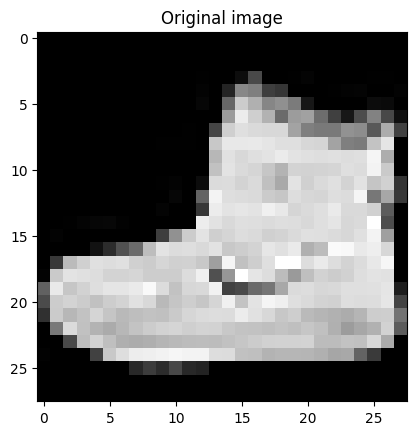

In [ ]:
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image');

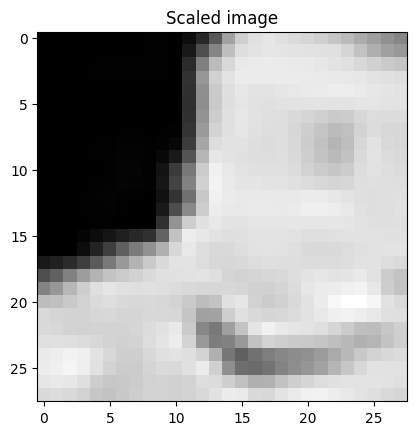

In [ ]:
aug = A.Affine(p=1, scale=2)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Scaled image');

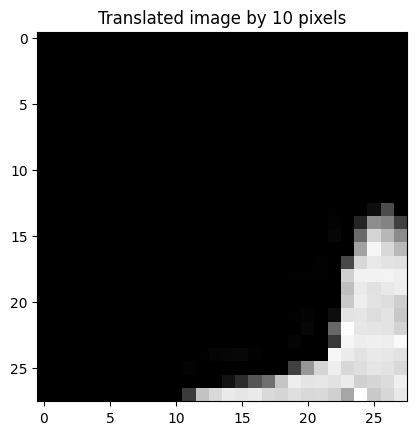

In [ ]:
aug = A.Affine(p=1, translate_px=10)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Translated image by 10 pixels');

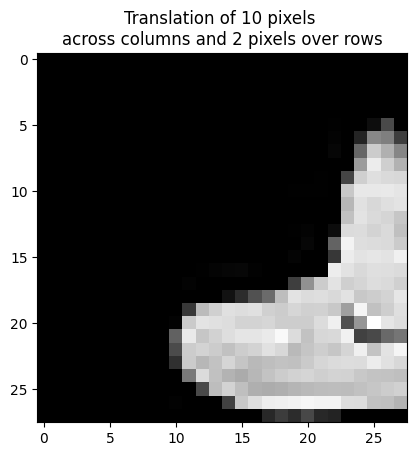

In [ ]:
aug = A.Affine(p=1, translate_px={'x':10,'y':2})
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Translation of 10 pixels \nacross columns \
and 2 pixels over rows');

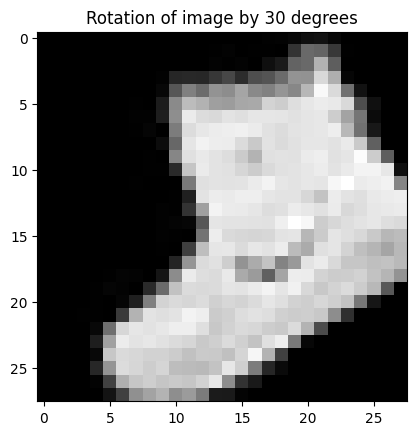

In [ ]:
aug = A.Affine(p=1, rotate=30)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Rotation of image by 30 degrees');

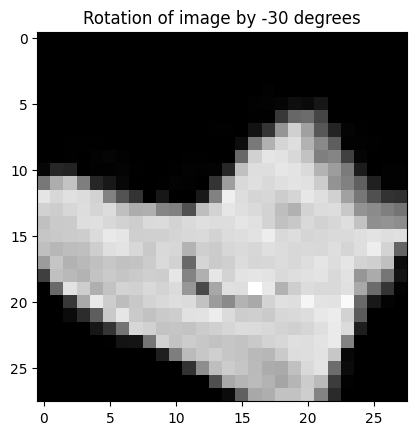

In [ ]:
aug = A.Affine(p=1, rotate=-30)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Rotation of image by -30 degrees');

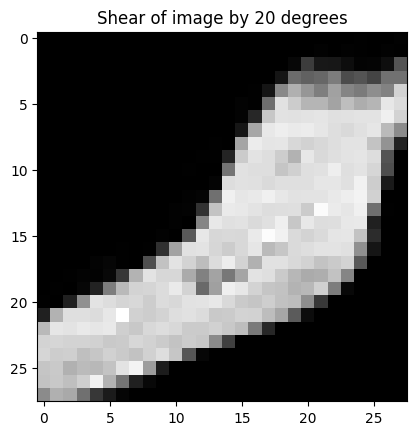

In [ ]:
aug = A.Affine(p=1, shear=20)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Shear of image by 20 degrees');

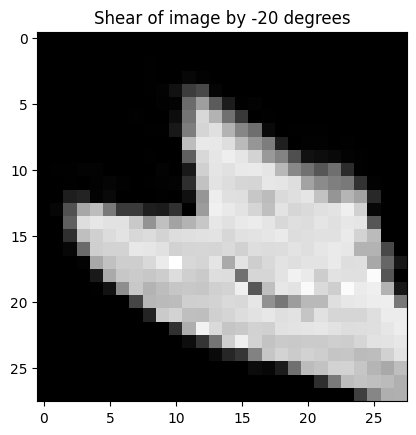

In [ ]:
aug = A.Affine(p=1, shear=-20)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Shear of image by -20 degrees');

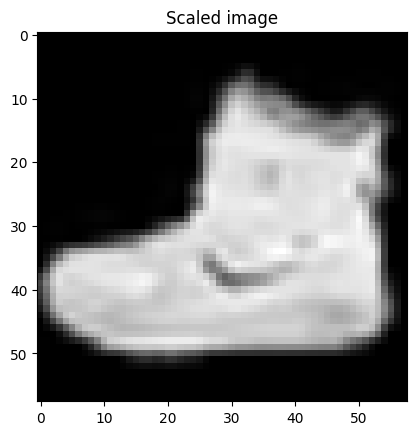

In [ ]:
aug = A.Affine(p=1, scale=2, fit_output=True, fill=0)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Scaled image');

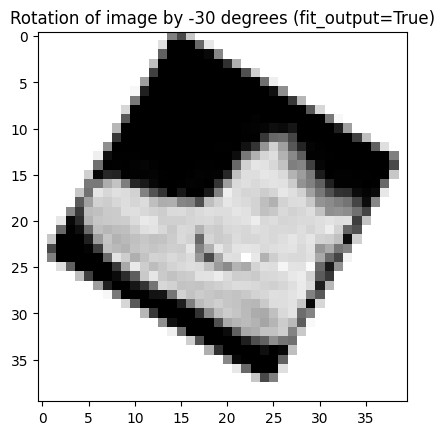

In [ ]:
aug = A.Affine(p=1, rotate=-30, fit_output=True, fill=255)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Rotation of image by -30 degrees (fit_output=True)');

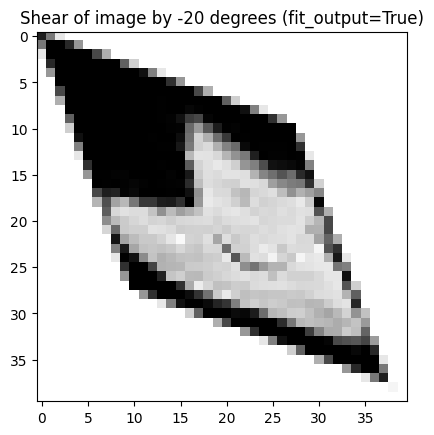

In [ ]:
aug = A.Affine(p=1, shear=-20, fit_output=True, fill=255)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray')
plt.title('Shear of image by -20 degrees (fit_output=True)');

border_mode
- 0	: cv2.BORDER_CONSTANT	    
- 1	: cv2.BORDER_REPLICATE	   
- 2	: cv2.BORDER_REFLECT	    
- 3	: cv2.BORDER_WRAP	        
- 4	: cv2.BORDER_REFLECT_101

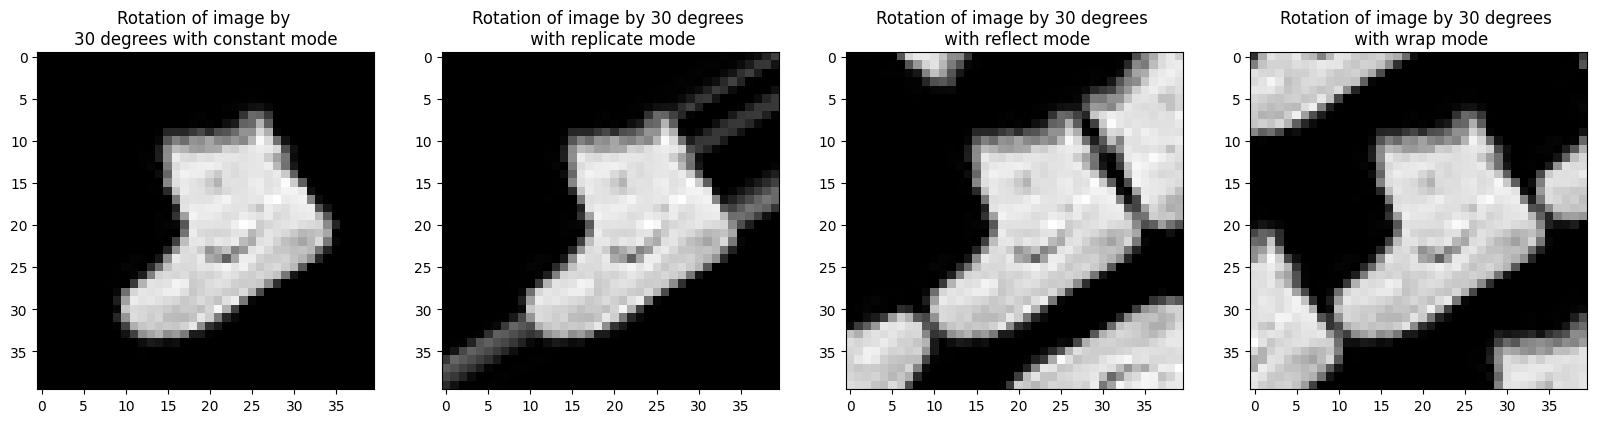

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(141)
aug = A.Affine(p=1, rotate=30, fit_output=True, fill=0, border_mode=0)
plt.imshow(aug(image=to_numpy(tr_images[0]))['image'], cmap='gray')
plt.title('Rotation of image by \n30 degrees with constant mode')
plt.subplot(142)
aug = A.Affine(p=1, rotate=30, fit_output=True, fill=0, border_mode=1)
plt.imshow(aug(image=to_numpy(tr_images[0]))['image'], cmap='gray')
plt.title('Rotation of image by 30 degrees \n with replicate mode')
plt.subplot(143)
aug = A.Affine(p=1, rotate=30, fit_output=True, fill=0, border_mode=2)
plt.imshow(aug(image=to_numpy(tr_images[0]))['image'], cmap='gray')
plt.title('Rotation of image by 30 degrees \n with reflect mode')
plt.subplot(144)
aug = A.Affine(p=1, rotate=30, fit_output=True, fill=0, border_mode=3)
plt.imshow(aug(image=to_numpy(tr_images[0]))['image'], cmap='gray')
plt.title('Rotation of image by 30 degrees \n with wrap mode')
plt.show()

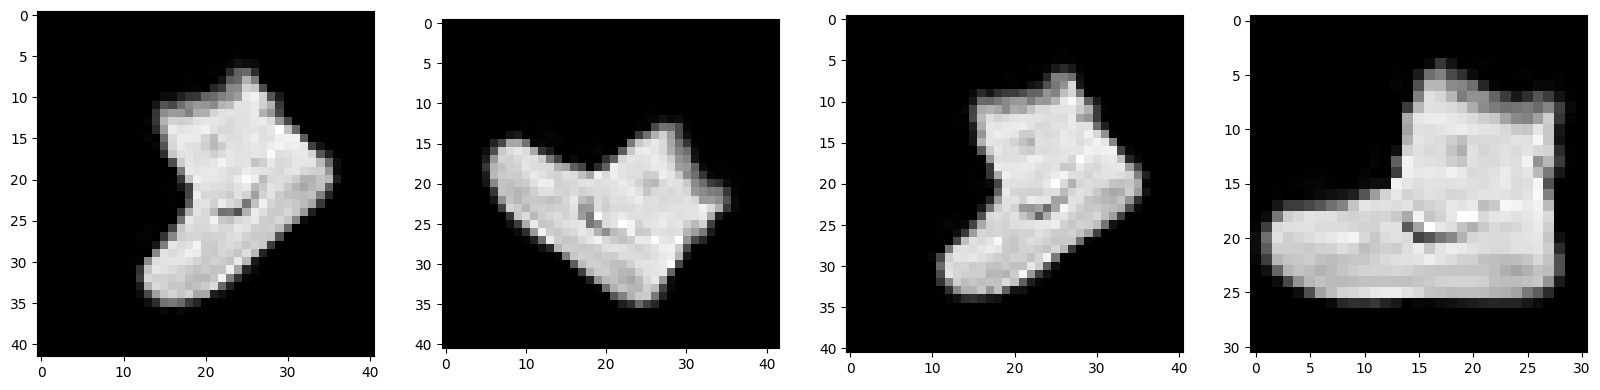

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(141)
aug = A.Affine(p=1, rotate=(-45, 45), fit_output=True, fill=0, border_mode=0)
plt.imshow(aug(image=to_numpy(tr_images[0]))['image'], cmap='gray')
plt.subplot(142)
aug = A.Affine(p=1, rotate=(-45, 45), fit_output=True, fill=0, border_mode=0)
plt.imshow(aug(image=to_numpy(tr_images[0]))['image'], cmap='gray')
plt.subplot(143)
aug = A.Affine(p=1, rotate=(-45, 45), fit_output=True, fill=0, border_mode=0)
plt.imshow(aug(image=to_numpy(tr_images[0]))['image'], cmap='gray')
plt.subplot(144)
aug = A.Affine(p=1, rotate=(-45, 45), fit_output=True, fill=0, border_mode=0)
plt.imshow(aug(image=to_numpy(tr_images[0]))['image'], cmap='gray')
plt.show()

In [ ]:
from functools import partial

def multiply(image, f, **kwargs):
    return image*f

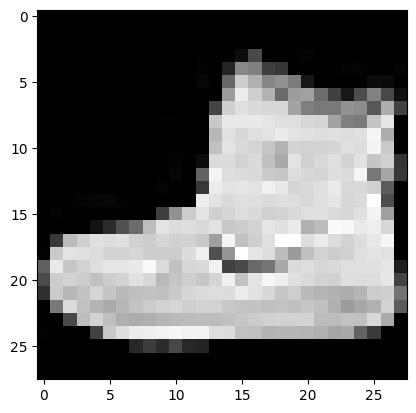

In [ ]:
aug = A.Lambda(p=1, image=partial(multiply, f=1))
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray', vmin = 0, vmax = 255);

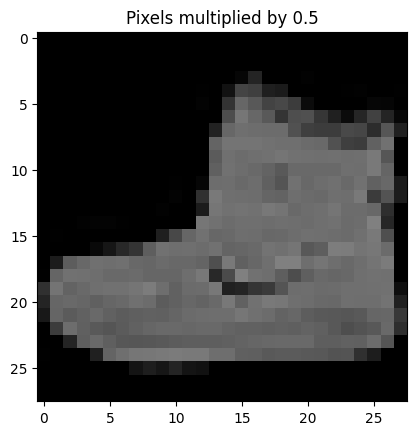

In [ ]:
aug = A.Lambda(p=1, image=partial(multiply, f=0.5))
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray', vmin = 0, vmax = 255)
plt.title('Pixels multiplied by 0.5');

In [ ]:
def linearcontrast(image, f, **kwargs):
    return 127 + f*(image - 127)

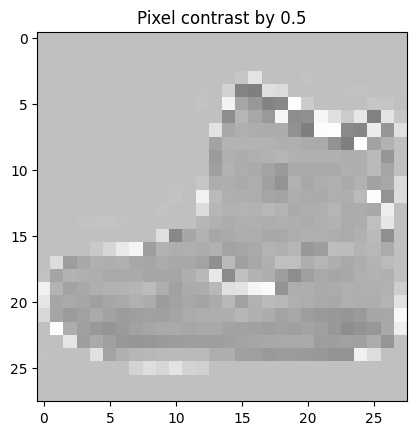

In [ ]:
aug = A.Lambda(p=1, image=partial(linearcontrast, f=0.5))
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray', vmin = 0, vmax = 255)
plt.title('Pixel contrast by 0.5');

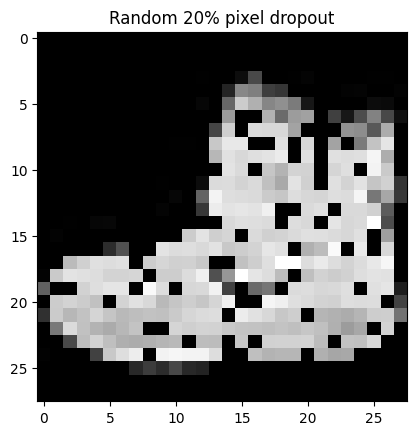

In [ ]:
aug = A.PixelDropout(p=1, dropout_prob=0.2)
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray', vmin = 0, vmax = 255)
plt.title('Random 20% pixel dropout');

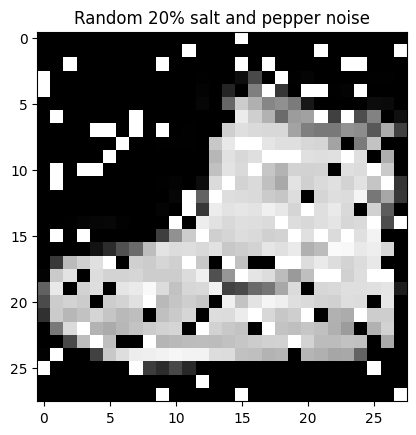

In [ ]:
aug = A.SaltAndPepper(p=1, amount=(0.2, 0.2))
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray', vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise');

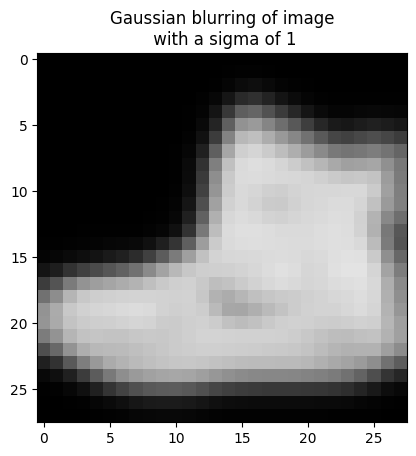

In [ ]:
aug = A.GaussianBlur(p=1, sigma_limit=(1, 1))
augmented = aug(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray', vmin = 0, vmax = 255)
plt.title('Gaussian blurring of image\n with a sigma of 1');

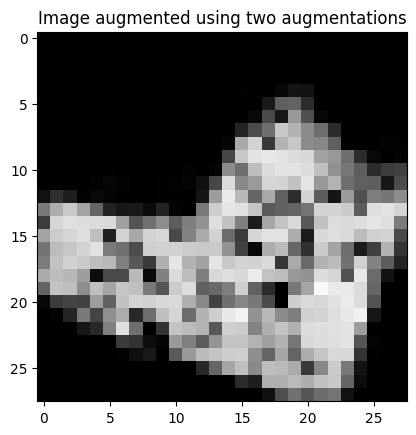

In [ ]:
seq = A.Compose([
    A.PixelDropout(p=1, dropout_prob=0.2),
    A.Affine(p=1, rotate=(-30, 30))
])
augmented = seq(image=to_numpy(tr_images[0]))['image']
plt.imshow(augmented, cmap='gray', vmin = 0, vmax = 255)
plt.title('Image augmented using two augmentations');